# 🚀 Deploy de IA com Streamlit: Da Sua Máquina Para o Mundo!

**Módulo 14 - Deploy e Produção com Streamlit**

![](https://s3.us-east-1.amazonaws.com/turing.education/notebooks/imagens/langchain-modulo-14_img_01.png)

Opa! Chegamos no momento mais emocionante do curso! Tá, mas o que adianta ter criado aqueles projetos lindos com LangChain se eles ficam só na sua máquina, né?

É como ter uma receita incrível de brigadeiro mas nunca servir pra ninguém! Hoje vamos aprender a colocar suas aplicações de IA no ar para todo mundo usar!

## O que vamos ver hoje:
- ✅ Como transformar seus projetos LangChain em apps web
- ✅ Deploy no Streamlit Cloud (de graça!)
- ✅ Configuração de segurança e variáveis de ambiente
- ✅ Monitoramento e otimização
- ✅ Troubleshooting dos problemas mais comuns

## 🎯 Por que Streamlit?

Tá, mas por que não usar Flask, Django ou qualquer outro framework? Simples!

Streamlit é como aquele amigo que sempre facilita sua vida:
- **Zero HTML/CSS/JavaScript**: Só Python puro!
- **Deploy em 5 minutos**: Literalmente!
- **Componentes prontos**: Widgets, gráficos, tudo já funciona
- **Integração perfeita**: Com pandas, matplotlib, plotly...

É tipo a diferença entre fazer um bolo do zero vs usar uma mistura pronta. Os dois funcionam, mas um é muito mais rápido!

**Dica!** Streamlit foi feito pensando em cientistas de dados e engenheiros de ML. Por isso funciona tão bem com nossos projetos de IA!

In [16]:
# Vamos instalar tudo que precisamos
!pip install streamlit langchain google-generativeai python-dotenv

## 📱 Criando Nossa Primeira App

Bora começar criando uma versão web do nosso chatbot do módulo anterior. É como transformar um WhatsApp pessoal em um site que todo mundo pode usar!

[![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggTFJcbiAgICBBW1VzdcOhcmlvXSAtLT4gQltTdHJlYW1saXQgVUldXG4gICAgQiAtLT4gQ1tMYW5nQ2hhaW5dXG4gICAgQyAtLT4gRFtHZW1pbmkgQVBJXVxuICAgIEQgLS0-IENcbiAgICBDIC0tPiBCXG4gICAgQiAtLT4gQSIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0IiwidGhlbWVWYXJpYWJsZXMiOnsiYmFja2dyb3VuZCI6IiNGQ0VBRUQiLCJwcmltYXJ5Q29sb3IiOiIjRTEzRjVFIiwic2Vjb25kYXJ5Q29sb3IiOiIjRkZGRkZGIiwidGVydGlhcnlDb2xvciI6ImhzbCgxODguNTE4NTE4NTE4NSwgNzIuOTcyOTcyOTczJSwgNTYuNDcwNTg4MjM1MyUpIiwicHJpbWFyeUJvcmRlckNvbG9yIjoiaHNsKDM0OC41MTg1MTg1MTg1LCAzMi45NzI5NzI5NzMlLCA0Ni40NzA1ODgyMzUzJSkiLCJzZWNvbmRhcnlCb3JkZXJDb2xvciI6ImhzbCgwLCAwJSwgOTAlKSIsInRlcnRpYXJ5Qm9yZGVyQ29sb3IiOiJoc2woMTg4LjUxODUxODUxODUsIDMyLjk3Mjk3Mjk3MyUsIDQ2LjQ3MDU4ODIzNTMlKSIsInByaW1hcnlUZXh0Q29sb3IiOiIjNGU0YzRkIiwic2Vjb25kYXJ5VGV4dENvbG9yIjoiIzAwMDAwMCIsInRlcnRpYXJ5VGV4dENvbG9yIjoicmdiKDE5MiwgNTIuOTk5OTk5OTk5OSwgMzApIiwibGluZUNvbG9yIjoiIzIzMjUyQyIsInRleHRDb2xvciI6IiMyMzI1MkMiLCJtYWluQmtnIjoiI0ZDRUFFRCIsInNlY29uZEJrZyI6IiNGNkI0QzIiLCJib3JkZXIxIjoiI0Y2NzA4RSIsImJvcmRlcjIiOiIjRTM0ODZBIiwiYXJyb3doZWFkQ29sb3IiOiIjMjMyNTJDIiwiZm9udEZhbWlseSI6IlwidHJlYnVjaGV0IG1zXCIsIHZlcmRhbmEsIGFyaWFsIiwiZm9udFNpemUiOiIxNHB4IiwibGFiZWxCYWNrZ3JvdW5kIjoiI2ZmZmZmZiIsIm5vZGVCa2ciOiIjRkNFQUVEIiwibm9kZUJvcmRlciI6IiNGNjcwOEUiLCJjbHVzdGVyQmtnIjoiI0Y2QjRDMiIsImNsdXN0ZXJCb3JkZXIiOiIjRTM0ODZBIiwiZGVmYXVsdExpbmtDb2xvciI6IiMyMzI1MkMiLCJ0aXRsZUNvbG9yIjoiIzIzMjUyQyIsImVkZ2VMYWJlbEJhY2tncm91bmQiOiIjZmZmZmZmIiwiYWN0b3JCb3JkZXIiOiJoc2woMzQ2LjU2NzE2NDE3OTEsIDg4LjE1Nzg5NDczNjglLCA5My4xOTYwNzg0MzE0JSkiLCJhY3RvckJrZyI6IiNGQ0VBRUQiLCJhY3RvclRleHRDb2xvciI6IiMyMzI1MkMiLCJhY3RvckxpbmVDb2xvciI6ImdyZXkiLCJzaWduYWxDb2xvciI6IiMyMzI1MkMiLCJzaWduYWxUZXh0Q29sb3IiOiIjMjMyNTJDIiwibGFiZWxCb3hCa2dDb2xvciI6IiNGQ0VBRUQiLCJsYWJlbEJveEJvcmRlckNvbG9yIjoiaHNsKDM0Ni41NjcxNjQxNzkxLCA4OC4xNTc4OTQ3MzY4JSwgOTMuMTk2MDc4NDMxNCUpIiwibGFiZWxUZXh0Q29sb3IiOiIjMjMyNTJDIiwibG9vcFRleHRDb2xvciI6IiMyMzI1MkMiLCJub3RlQm9yZGVyQ29sb3IiOiIjRTM0ODZBIiwibm90ZUJrZ0NvbG9yIjoiI0Y2NzA4RSIsIm5vdGVUZXh0Q29sb3IiOiIjMjMyNTJDIiwiYWN0aXZhdGlvbkJvcmRlckNvbG9yIjoiIzJDMkQzMiIsImFjdGl2YXRpb25Ca2dDb2xvciI6IiNGNkI0QzIiLCJzZXF1ZW5jZU51bWJlckNvbG9yIjoiIzJDMkQzMiIsInNlY3Rpb25Ca2dDb2xvciI6IiNGNkI0QzIiLCJhbHRTZWN0aW9uQmtnQ29sb3IiOiJ3aGl0ZSIsInNlY3Rpb25Ca2dDb2xvcjIiOiIjZmZmNDAwIiwidGFza0JvcmRlckNvbG9yIjoiI0UxM0Y1RSIsInRhc2tCa2dDb2xvciI6IiNGNjcwOEUiLCJ0YXNrVGV4dExpZ2h0Q29sb3IiOiJ3aGl0ZSIsInRhc2tUZXh0Q29sb3IiOiJ3aGl0ZSIsInRhc2tUZXh0RGFya0NvbG9yIjoiYmxhY2siLCJ0YXNrVGV4dE91dHNpZGVDb2xvciI6ImJsYWNrIiwidGFza1RleHRDbGlja2FibGVDb2xvciI6IiNFMTNGNUUiLCJhY3RpdmVUYXNrQm9yZGVyQ29sb3IiOiIjRTEzRjVFIiwiYWN0aXZlVGFza0JrZ0NvbG9yIjoiI0Y2NzA4RSIsImdyaWRDb2xvciI6ImxpZ2h0Z3JleSIsImRvbmVUYXNrQmtnQ29sb3IiOiJsaWdodGdyZXkiLCJkb25lVGFza0JvcmRlckNvbG9yIjoiZ3JleSIsImNyaXRCb3JkZXJDb2xvciI6IiNFMTNGNUUiLCJjcml0QmtnQ29sb3IiOiJyZWQiLCJ0b2RheUxpbmVDb2xvciI6InJlZCIsImxhYmVsQ29sb3IiOiJibGFjayIsImVycm9yQmtnQ29sb3IiOiIjNTUyMjIyIiwiZXJyb3JUZXh0Q29sb3IiOiIjNTUyMjIyIiwiY2xhc3NUZXh0IjoiIzRlNGM0ZCIsImZpbGxUeXBlMCI6IiNFMTNGNUUiLCJmaWxsVHlwZTEiOiIjRkZGRkZGIiwiZmlsbFR5cGUyIjoiaHNsKDUyLjUxODUxODUxODUsIDcyLjk3Mjk3Mjk3MyUsIDU2LjQ3MDU4ODIzNTMlKSIsImZpbGxUeXBlMyI6ImhzbCg2NCwgMCUsIDEwMCUpIiwiZmlsbFR5cGU0IjoiaHNsKDI4NC41MTg1MTg1MTg1LCA3Mi45NzI5NzI5NzMlLCA1Ni40NzA1ODgyMzUzJSkiLCJmaWxsVHlwZTUiOiJoc2woLTY0LCAwJSwgMTAwJSkiLCJmaWxsVHlwZTYiOiJoc2woMTE2LjUxODUxODUxODUsIDcyLjk3Mjk3Mjk3MyUsIDU2LjQ3MDU4ODIzNTMlKSIsImZpbGxUeXBlNyI6ImhzbCgxMjgsIDAlLCAxMDAlKSJ9fSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)](https://mermaid.d.foundation/#/edit/eyJjb2RlIjoiZ3JhcGggTFJcbiAgICBBW1VzdcOhcmlvXSAtLT4gQltTdHJlYW1saXQgVUldXG4gICAgQiAtLT4gQ1tMYW5nQ2hhaW5dXG4gICAgQyAtLT4gRFtHZW1pbmkgQVBJXVxuICAgIEQgLS0-IENcbiAgICBDIC0tPiBCXG4gICAgQiAtLT4gQSIsIm1lcm1haWQiOnsidGhlbWUiOiJkZWZhdWx0IiwidGhlbWVWYXJpYWJsZXMiOnsiYmFja2dyb3VuZCI6IiNGQ0VBRUQiLCJwcmltYXJ5Q29sb3IiOiIjRTEzRjVFIiwic2Vjb25kYXJ5Q29sb3IiOiIjRkZGRkZGIiwidGVydGlhcnlDb2xvciI6ImhzbCgxODguNTE4NTE4NTE4NSwgNzIuOTcyOTcyOTczJSwgNTYuNDcwNTg4MjM1MyUpIiwicHJpbWFyeUJvcmRlckNvbG9yIjoiaHNsKDM0OC41MTg1MTg1MTg1LCAzMi45NzI5NzI5NzMlLCA0Ni40NzA1ODgyMzUzJSkiLCJzZWNvbmRhcnlCb3JkZXJDb2xvciI6ImhzbCgwLCAwJSwgOTAlKSIsInRlcnRpYXJ5Qm9yZGVyQ29sb3IiOiJoc2woMTg4LjUxODUxODUxODUsIDMyLjk3Mjk3Mjk3MyUsIDQ2LjQ3MDU4ODIzNTMlKSIsInByaW1hcnlUZXh0Q29sb3IiOiIjNGU0YzRkIiwic2Vjb25kYXJ5VGV4dENvbG9yIjoiIzAwMDAwMCIsInRlcnRpYXJ5VGV4dENvbG9yIjoicmdiKDE5MiwgNTIuOTk5OTk5OTk5OSwgMzApIiwibGluZUNvbG9yIjoiIzIzMjUyQyIsInRleHRDb2xvciI6IiMyMzI1MkMiLCJtYWluQmtnIjoiI0ZDRUFFRCIsInNlY29uZEJrZyI6IiNGNkI0QzIiLCJib3JkZXIxIjoiI0Y2NzA4RSIsImJvcmRlcjIiOiIjRTM0ODZBIiwiYXJyb3doZWFkQ29sb3IiOiIjMjMyNTJDIiwiZm9udEZhbWlseSI6IlwidHJlYnVjaGV0IG1zXCIsIHZlcmRhbmEsIGFyaWFsIiwiZm9udFNpemUiOiIxNHB4IiwibGFiZWxCYWNrZ3JvdW5kIjoiI2ZmZmZmZiIsIm5vZGVCa2ciOiIjRkNFQUVEIiwibm9kZUJvcmRlciI6IiNGNjcwOEUiLCJjbHVzdGVyQmtnIjoiI0Y2QjRDMiIsImNsdXN0ZXJCb3JkZXIiOiIjRTM0ODZBIiwiZGVmYXVsdExpbmtDb2xvciI6IiMyMzI1MkMiLCJ0aXRsZUNvbG9yIjoiIzIzMjUyQyIsImVkZ2VMYWJlbEJhY2tncm91bmQiOiIjZmZmZmZmIiwiYWN0b3JCb3JkZXIiOiJoc2woMzQ2LjU2NzE2NDE3OTEsIDg4LjE1Nzg5NDczNjglLCA5My4xOTYwNzg0MzE0JSkiLCJhY3RvckJrZyI6IiNGQ0VBRUQiLCJhY3RvclRleHRDb2xvciI6IiMyMzI1MkMiLCJhY3RvckxpbmVDb2xvciI6ImdyZXkiLCJzaWduYWxDb2xvciI6IiMyMzI1MkMiLCJzaWduYWxUZXh0Q29sb3IiOiIjMjMyNTJDIiwibGFiZWxCb3hCa2dDb2xvciI6IiNGQ0VBRUQiLCJsYWJlbEJveEJvcmRlckNvbG9yIjoiaHNsKDM0Ni41NjcxNjQxNzkxLCA4OC4xNTc4OTQ3MzY4JSwgOTMuMTk2MDc4NDMxNCUpIiwibGFiZWxUZXh0Q29sb3IiOiIjMjMyNTJDIiwibG9vcFRleHRDb2xvciI6IiMyMzI1MkMiLCJub3RlQm9yZGVyQ29sb3IiOiIjRTM0ODZBIiwibm90ZUJrZ0NvbG9yIjoiI0Y2NzA4RSIsIm5vdGVUZXh0Q29sb3IiOiIjMjMyNTJDIiwiYWN0aXZhdGlvbkJvcmRlckNvbG9yIjoiIzJDMkQzMiIsImFjdGl2YXRpb25Ca2dDb2xvciI6IiNGNkI0QzIiLCJzZXF1ZW5jZU51bWJlckNvbG9yIjoiIzJDMkQzMiIsInNlY3Rpb25Ca2dDb2xvciI6IiNGNkI0QzIiLCJhbHRTZWN0aW9uQmtnQ29sb3IiOiJ3aGl0ZSIsInNlY3Rpb25Ca2dDb2xvcjIiOiIjZmZmNDAwIiwidGFza0JvcmRlckNvbG9yIjoiI0UxM0Y1RSIsInRhc2tCa2dDb2xvciI6IiNGNjcwOEUiLCJ0YXNrVGV4dExpZ2h0Q29sb3IiOiJ3aGl0ZSIsInRhc2tUZXh0Q29sb3IiOiJ3aGl0ZSIsInRhc2tUZXh0RGFya0NvbG9yIjoiYmxhY2siLCJ0YXNrVGV4dE91dHNpZGVDb2xvciI6ImJsYWNrIiwidGFza1RleHRDbGlja2FibGVDb2xvciI6IiNFMTNGNUUiLCJhY3RpdmVUYXNrQm9yZGVyQ29sb3IiOiIjRTEzRjVFIiwiYWN0aXZlVGFza0JrZ0NvbG9yIjoiI0Y2NzA4RSIsImdyaWRDb2xvciI6ImxpZ2h0Z3JleSIsImRvbmVUYXNrQmtnQ29sb3IiOiJsaWdodGdyZXkiLCJkb25lVGFza0JvcmRlckNvbG9yIjoiZ3JleSIsImNyaXRCb3JkZXJDb2xvciI6IiNFMTNGNUUiLCJjcml0QmtnQ29sb3IiOiJyZWQiLCJ0b2RheUxpbmVDb2xvciI6InJlZCIsImxhYmVsQ29sb3IiOiJibGFjayIsImVycm9yQmtnQ29sb3IiOiIjNTUyMjIyIiwiZXJyb3JUZXh0Q29sb3IiOiIjNTUyMjIyIiwiY2xhc3NUZXh0IjoiIzRlNGM0ZCIsImZpbGxUeXBlMCI6IiNFMTNGNUUiLCJmaWxsVHlwZTEiOiIjRkZGRkZGIiwiZmlsbFR5cGUyIjoiaHNsKDUyLjUxODUxODUxODUsIDcyLjk3Mjk3Mjk3MyUsIDU2LjQ3MDU4ODIzNTMlKSIsImZpbGxUeXBlMyI6ImhzbCg2NCwgMCUsIDEwMCUpIiwiZmlsbFR5cGU0IjoiaHNsKDI4NC41MTg1MTg1MTg1LCA3Mi45NzI5NzI5NzMlLCA1Ni40NzA1ODgyMzUzJSkiLCJmaWxsVHlwZTUiOiJoc2woLTY0LCAwJSwgMTAwJSkiLCJmaWxsVHlwZTYiOiJoc2woMTE2LjUxODUxODUxODUsIDcyLjk3Mjk3Mjk3MyUsIDU2LjQ3MDU4ODIzNTMlKSIsImZpbGxUeXBlNyI6ImhzbCgxMjgsIDAlLCAxMDAlKSJ9fSwidXBkYXRlRWRpdG9yIjpmYWxzZX0)

**Dica!** No Colab, vamos criar os arquivos usando magic commands. Em casa, você vai criar arquivos normais mesmo!

In [17]:
# Criando nossa primeira app Streamlit
app_code = '''
import streamlit as st
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

# Configuração da página
st.set_page_config(
    page_title="Meu Chatbot IA",
    page_icon="🤖",
    layout="wide"
)

# Título da aplicação
st.title("🤖 Chatbot com LangChain")
st.write("Olá! Eu sou seu assistente de IA. Como posso ajudar?")

# Sidebar para configurações
with st.sidebar:
    st.header("⚙️ Configurações")
    api_key = st.text_input("API Key do Google:", type="password")
    temperatura = st.slider("Criatividade", 0.0, 1.0, 0.7)

# Inicializar o chat apenas se tiver API key
if api_key:
    # Configurar o modelo
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        google_api_key=api_key,
        temperature=temperatura
    )

    # Sistema de mensagens
    if "messages" not in st.session_state:
        st.session_state.messages = []

    # Mostrar mensagens anteriores
    for message in st.session_state.messages:
        with st.chat_message(message["role"]):
            st.write(message["content"])

    # Input do usuário
    if prompt := st.chat_input("Digite sua mensagem..."):
        # Adicionar mensagem do usuário
        st.session_state.messages.append({"role": "user", "content": prompt})

        with st.chat_message("user"):
            st.write(prompt)

        # Gerar resposta
        with st.chat_message("assistant"):
            with st.spinner("Pensando..."):
                messages = [
                    SystemMessage(content="Você é um assistente prestativo e amigável."),
                    HumanMessage(content=prompt)
                ]
                response = llm.invoke(messages)
                st.write(response.content)

        # Salvar resposta
        st.session_state.messages.append({"role": "assistant", "content": response.content})

else:
    st.warning("Por favor, insira sua API Key do Google na barra lateral para começar!")
    st.info("💡 **Dica:** Você pode obter sua API key em https://aistudio.google.com/usage")
'''

# Salvar o arquivo
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print("✅ Arquivo app.py criado com sucesso!")
print("Para rodar: streamlit run app.py")

✅ Arquivo app.py criado com sucesso!
Para rodar: streamlit run app.py


## 🔑 Gerenciando Variáveis de Ambiente

Tá, mas deixar a API key visível no código é como deixar a chave de casa debaixo do tapete com um bilhete "chave aqui"! 😅

Vamos usar variáveis de ambiente, que é o jeito profissional de guardar informações sensíveis.

**Dica!** Em produção, NUNCA coloque API keys diretamente no código. É questão de segurança!

In [18]:
# Criando arquivo .env para variáveis de ambiente
env_content = '''
GOOGLE_API_KEY=SUA+CHAVEEE
APP_TITLE=Meu Chatbot Incrível
DEBUG=False
'''

with open('.env', 'w') as f:
    f.write(env_content)

print("📝 Arquivo .env criado!")
print("Lembre-se de:")
print("1. Adicionar sua API key real")
print("2. Nunca commitar o .env no Git")
print("3. Criar um .env.example para outros desenvolvedores")

📝 Arquivo .env criado!
Lembre-se de:
1. Adicionar sua API key real
2. Nunca commitar o .env no Git
3. Criar um .env.example para outros desenvolvedores


In [19]:
# Versão melhorada da nossa app com variáveis de ambiente
app_secure_code = '''
import streamlit as st
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

# Carregar variáveis de ambiente
load_dotenv()

# Configuração da página
st.set_page_config(
    page_title=os.getenv("APP_TITLE", "Chatbot IA"),
    page_icon="🤖",
    layout="wide"
)

# Título da aplicação
st.title("🤖 Chatbot Profissional com LangChain")
st.write("Versão segura com variáveis de ambiente!")

# Verificar se temos API key
api_key = os.getenv("GOOGLE_API_KEY")

if not api_key:
    st.error("❌ API Key não encontrada!")
    st.info("Configure a variável GOOGLE_API_KEY no arquivo .env")
    st.stop()

# Sidebar para configurações
with st.sidebar:
    st.header("⚙️ Configurações")
    temperatura = st.slider("Criatividade", 0.0, 1.0, 0.7)
    modelo = st.selectbox(
        "Modelo",
        ["gemini-2.0-flash", "gemini-1.5-pro"]
    )

    if st.button("🗑️ Limpar Conversa"):
        st.session_state.messages = []
        st.rerun()

# Configurar o modelo
try:
    llm = ChatGoogleGenerativeAI(
        model=modelo,
        google_api_key=api_key,
        temperature=temperatura
    )
except Exception as e:
    st.error(f"Erro ao configurar modelo: {e}")
    st.stop()

# Sistema de mensagens
if "messages" not in st.session_state:
    st.session_state.messages = []

# Mostrar mensagens anteriores
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.write(message["content"])

# Input do usuário
if prompt := st.chat_input("Digite sua mensagem..."):
    # Adicionar mensagem do usuário
    st.session_state.messages.append({"role": "user", "content": prompt})

    with st.chat_message("user"):
        st.write(prompt)

    # Gerar resposta
    with st.chat_message("assistant"):
        with st.spinner("Pensando..."):
            try:
                messages = [
                    SystemMessage(content="Você é um assistente prestativo e amigável."),
                    HumanMessage(content=prompt)
                ]
                response = llm.invoke(messages)
                st.write(response.content)

                # Salvar resposta
                st.session_state.messages.append({"role": "assistant", "content": response.content})

            except Exception as e:
                st.error(f"Erro ao gerar resposta: {e}")

# Footer
st.markdown("---")
st.markdown("💡 **Dica:** Esta aplicação usa LangChain + Streamlit para máxima performance!")
'''

# Salvar versão segura
with open('app_secure.py', 'w', encoding='utf-8') as f:
    f.write(app_secure_code)

print("🔒 Versão segura criada: app_secure.py")

🔒 Versão segura criada: app_secure.py


## 📦 Arquivo requirements.txt

O requirements.txt é como uma lista de compras para o servidor. Ele diz exatamente quais bibliotecas sua aplicação precisa para funcionar.

É tipo quando você vai fazer um bolo e anota todos os ingredientes - sem isso, o servidor não vai saber o que instalar!

**Dica!** Sempre fixe as versões das bibliotecas críticas para evitar surpresas em produção!

In [20]:
# Criando requirements.txt
requirements = '''
streamlit>=1.28.0
langchain>=0.3.0
langchain-google-genai>=2.0.0
python-dotenv>=1.0.0
pandas>=2.0.0
numpy>=1.24.0
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements.strip())

print("📋 requirements.txt criado!")

# Vamos também criar um arquivo de configuração do Streamlit
config_content = '''
[general]
email = "seu-email@exemplo.com"

[server]
headless = true
enableCORS = false
port = 8501

[theme]
primaryColor = "#FF6B6B"
backgroundColor = "#FFFFFF"
secondaryBackgroundColor = "#F0F2F6"
textColor = "#262730"
'''

# Criar pasta .streamlit se não existir
import os
if not os.path.exists('.streamlit'):
    os.makedirs('.streamlit')

with open('.streamlit/config.toml', 'w') as f:
    f.write(config_content.strip())

print("⚙️ Configuração do Streamlit criada!")

📋 requirements.txt criado!
⚙️ Configuração do Streamlit criada!


## 🚀 Deploy no Streamlit Cloud

Agora vem a parte mais emocionante! Vamos colocar nossa aplicação no ar de graça!

O Streamlit Cloud é como um Heroku específico para apps Streamlit. É gratuito, fácil de usar e se integra direto com o GitHub.

![](https://s3.us-east-1.amazonaws.com/turing.education/notebooks/imagens/langchain-modulo-14_img_02.png)

### Passo a passo:

1. **Criar repositório no GitHub**
2. **Fazer upload dos arquivos**
3. **Conectar no Streamlit Cloud**
4. **Configurar variáveis de ambiente**
5. **Deploy automático!**

**Dica!** O deploy é automático sempre que você fizer push no GitHub. É deploy contínuo na veia!

In [21]:
# Vamos criar um .gitignore para não subir arquivos sensíveis
gitignore_content = '''
# Arquivos de ambiente
.env
.env.local
.env.*.local

# Cache do Python
__pycache__/
*.py[cod]
*$py.class
*.so

# Jupyter Notebook
.ipynb_checkpoints

# Streamlit
.streamlit/secrets.toml

# IDE
.vscode/
.idea/

# OS
.DS_Store
Thumbs.db
'''

with open('.gitignore', 'w') as f:
    f.write(gitignore_content.strip())

print("🚫 .gitignore criado - seus segredos estão seguros!")

# Criar um README.md explicativo
readme_content = '''
# 🤖 Chatbot com LangChain e Streamlit

Uma aplicação web moderna que combina o poder do LangChain com a simplicidade do Streamlit!

## 🚀 Como usar

1. Clone este repositório
2. Instale as dependências: `pip install -r requirements.txt`
3. Configure sua API key no arquivo `.env`
4. Execute: `streamlit run app_secure.py`

## 🔧 Configuração

Crie um arquivo `.env` com:
```
GOOGLE_API_KEY=sua_api_key_aqui
APP_TITLE=Seu Título Aqui
```

## 📱 Deploy

Esta aplicação está pronta para deploy no Streamlit Cloud!

## 🛠️ Tecnologias

- **Streamlit**: Interface web
- **LangChain**: Framework de IA
- **Google Gemini**: Modelo de linguagem
- **Python**: Linguagem de programação
'''

with open('README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content.strip())

print("📚 README.md criado - documentação completa!")

🚫 .gitignore criado - seus segredos estão seguros!
📚 README.md criado - documentação completa!


## 🔐 Secrets no Streamlit Cloud

No Streamlit Cloud, as variáveis de ambiente são chamadas de "secrets". É como um cofre digital onde você guarda suas API keys.

Tá, mas como configurar? É simples:

1. Vá no painel do Streamlit Cloud
2. Clique em "Settings" da sua app
3. Vá na aba "Secrets"
4. Cole suas variáveis no formato TOML

**Dica!** O Streamlit Cloud usa formato TOML para secrets, não .env!

In [22]:
# Exemplo de como acessar secrets no Streamlit Cloud
secrets_example = '''
import streamlit as st

# No Streamlit Cloud, use st.secrets
# Localmente, pode usar dotenv

def get_api_key():
    """Função para pegar API key independente do ambiente"""
    try:
        # Primeiro tenta pegar do Streamlit secrets
        return st.secrets["GOOGLE_API_KEY"]
    except:
        # Se não conseguir, tenta do ambiente local
        import os
        from dotenv import load_dotenv
        load_dotenv()
        return os.getenv("GOOGLE_API_KEY")

# Usar a função
api_key = get_api_key()

if api_key:
    st.success("✅ API Key carregada com sucesso!")
else:
    st.error("❌ API Key não encontrada!")
'''

print("Exemplo de código para acessar secrets:")
print(secrets_example)

# Exemplo do arquivo secrets.toml
secrets_toml = '''
# .streamlit/secrets.toml
GOOGLE_API_KEY = "sua_api_key_aqui"
APP_TITLE = "Meu Chatbot Incrível"
DEBUG = false
'''

print("\n📋 Formato do secrets.toml:")
print(secrets_toml)

Exemplo de código para acessar secrets:

import streamlit as st

# No Streamlit Cloud, use st.secrets
# Localmente, pode usar dotenv

def get_api_key():
    """Função para pegar API key independente do ambiente"""
    try:
        # Primeiro tenta pegar do Streamlit secrets
        return st.secrets["GOOGLE_API_KEY"]
    except:
        # Se não conseguir, tenta do ambiente local
        import os
        from dotenv import load_dotenv
        load_dotenv()
        return os.getenv("GOOGLE_API_KEY")

# Usar a função
api_key = get_api_key()

if api_key:
    st.success("✅ API Key carregada com sucesso!")
else:
    st.error("❌ API Key não encontrada!")


📋 Formato do secrets.toml:

# .streamlit/secrets.toml
GOOGLE_API_KEY = "sua_api_key_aqui"
APP_TITLE = "Meu Chatbot Incrível"
DEBUG = false



## 📊 Monitoramento e Analytics

Tá, mas depois que sua app está no ar, como saber se está tudo funcionando? É como abrir uma loja e não saber quantos clientes entraram!

Vamos adicionar algumas métricas básicas para acompanhar o uso da nossa aplicação.

**Dica!** Streamlit tem analytics básicos grátis, mas você pode integrar com Google Analytics para mais detalhes!

In [23]:
# Versão com monitoramento básico
app_with_analytics = '''
import streamlit as st
import os
from datetime import datetime
import json
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

# Carregar variáveis de ambiente
load_dotenv()

# Configuração da página
st.set_page_config(
    page_title="Chatbot com Analytics",
    page_icon="📊",
    layout="wide"
)

# Função para log simples
def log_interaction(user_input, response_length):
    """Log básico das interações"""
    if "interaction_count" not in st.session_state:
        st.session_state.interaction_count = 0

    st.session_state.interaction_count += 1

    # Em produção, você salvaria isso em um banco de dados
    log_data = {
        "timestamp": datetime.now().isoformat(),
        "user_input_length": len(user_input),
        "response_length": response_length,
        "interaction_number": st.session_state.interaction_count
    }

    return log_data

# Sidebar com analytics
with st.sidebar:
    st.header("📊 Analytics")

    if "interaction_count" in st.session_state:
        st.metric("Interações", st.session_state.interaction_count)

    if "messages" in st.session_state:
        st.metric("Mensagens", len(st.session_state.messages))

    st.header("⚙️ Configurações")
    temperatura = st.slider("Criatividade", 0.0, 1.0, 0.7)

# Título da aplicação
st.title("📊 Chatbot com Monitoramento")
st.write("Agora com analytics integrados!")

# Verificar API key
def get_api_key():
    try:
        return st.secrets["GOOGLE_API_KEY"]
    except:
        return os.getenv("GOOGLE_API_KEY")

api_key = get_api_key()

if not api_key:
    st.error("❌ API Key não encontrada!")
    st.stop()

# Configurar o modelo
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=api_key,
    temperature=temperatura
)

# Sistema de mensagens
if "messages" not in st.session_state:
    st.session_state.messages = []

# Mostrar mensagens anteriores
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.write(message["content"])

# Input do usuário
if prompt := st.chat_input("Digite sua mensagem..."):
    # Adicionar mensagem do usuário
    st.session_state.messages.append({"role": "user", "content": prompt})

    with st.chat_message("user"):
        st.write(prompt)

    # Gerar resposta
    with st.chat_message("assistant"):
        with st.spinner("Pensando..."):
            messages = [
                SystemMessage(content="Você é um assistente prestativo e amigável."),
                HumanMessage(content=prompt)
            ]
            response = llm.invoke(messages)
            st.write(response.content)

            # Log da interação
            log_data = log_interaction(prompt, len(response.content))

            # Salvar resposta
            st.session_state.messages.append({"role": "assistant", "content": response.content})

# Footer com info
st.markdown("---")
col1, col2, col3 = st.columns(3)

with col1:
    st.metric("Status", "🟢 Online")

with col2:
    if "interaction_count" in st.session_state:
        st.metric("Interações", st.session_state.interaction_count)

with col3:
    st.metric("Modelo", "Gemini 2.0")
'''

# Salvar versão com analytics
with open('app_analytics.py', 'w', encoding='utf-8') as f:
    f.write(app_with_analytics)

print("📊 Versão com analytics criada: app_analytics.py")

📊 Versão com analytics criada: app_analytics.py


## 🛠️ Troubleshooting: Problemas Comuns

Todo deploy tem seus perrengues! É como dirigir - você aprende a resolver os problemas mais comuns. Aqui estão os que eu mais vejo:

### 🔴 Problemas e Soluções:

| Problema | Causa | Solução |
|----------|-------|----------|
| App não carrega | requirements.txt errado | Verificar versões das bibliotecas |
| API Key não funciona | Secrets mal configurados | Checar formato TOML |
| App lenta | Modelo muito pesado | Usar modelo mais leve ou cache |
| Memory error | Session state muito grande | Limitar histórico de mensagens |
| Deploy falha | Arquivo muito grande | Otimizar código e dependências |

**Dica!** Sempre teste localmente antes de fazer deploy. É como ensaiar antes da apresentação!

In [24]:
# Script para debug e diagnóstico
debug_script = '''
import streamlit as st
import sys
import os
from datetime import datetime

st.title("🔧 Debug Dashboard")
st.write("Informações para troubleshooting")

# Informações do sistema
st.header("💻 Sistema")
col1, col2 = st.columns(2)

with col1:
    st.write(f"**Python:** {sys.version}")
    st.write(f"**Streamlit:** {st.__version__}")
    st.write(f"**Timestamp:** {datetime.now()}")

with col2:
    st.write(f"**Platform:** {sys.platform}")
    st.write(f"**Encoding:** {sys.getdefaultencoding()}")

# Verificar variáveis de ambiente
st.header("🔑 Variáveis de Ambiente")

# Checar se API key existe (sem mostrar o valor)
def check_api_key():
    try:
        key = st.secrets.get("GOOGLE_API_KEY")
        if key:
            return f"✅ Encontrada (tamanho: {len(key)})")
        else:
            return "❌ Não encontrada nos secrets"
    except:
        try:
            key = os.getenv("GOOGLE_API_KEY")
            if key:
                return f"✅ Encontrada no .env (tamanho: {len(key)})"
            else:
                return "❌ Não encontrada no .env"
        except:
            return "❌ Erro ao verificar"

st.write(f"**API Key:** {check_api_key()}")

# Testar imports
st.header("📦 Bibliotecas")

libraries = [
    "langchain",
    "langchain_google_genai",
    "dotenv",
    "pandas",
    "numpy"
]

for lib in libraries:
    try:
        __import__(lib)
        st.write(f"✅ {lib}")
    except ImportError as e:
        st.write(f"❌ {lib}: {e}")

# Session State
st.header("💾 Session State")
st.write(f"**Chaves:** {list(st.session_state.keys())}")

if st.session_state:
    st.json(dict(st.session_state))
else:
    st.write("Session state vazio")

# Botão de teste
if st.button("🧪 Test API Connection"):
    try:
        from langchain_google_genai import ChatGoogleGenerativeAI

        api_key = st.secrets.get("GOOGLE_API_KEY") or os.getenv("GOOGLE_API_KEY")

        if api_key:
            llm = ChatGoogleGenerativeAI(
                model="gemini-2.0-flash",
                google_api_key=api_key
            )

            response = llm.invoke("Diga apenas 'OK' se você está funcionando")
            st.success(f"✅ API funcionando: {response.content}")

        else:
            st.error("❌ API Key não encontrada")

    except Exception as e:
        st.error(f"❌ Erro na API: {e}")
'''

with open('debug.py', 'w', encoding='utf-8') as f:
    f.write(debug_script)

print("🔧 Script de debug criado: debug.py")
print("Use: streamlit run debug.py para diagnosticar problemas")

🔧 Script de debug criado: debug.py
Use: streamlit run debug.py para diagnosticar problemas


## ⚡ Otimização e Performance

Tá, mas sua app está lenta? É como um carro que não acelera - tem várias coisas que podem estar travando!

### Principais otimizações:

1. **Cache de dados**: Use `@st.cache_data`
2. **Cache de recursos**: Use `@st.cache_resource`
3. **Lazy loading**: Carregue apenas quando necessário
4. **Sessão otimizada**: Limite o tamanho do session_state

**Dica!** O cache do Streamlit é poderoso, mas use com cuidado em funções que dependem de API keys!

In [25]:
# Versão otimizada da nossa app
app_optimized = '''
import streamlit as st
import os
from datetime import datetime
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

# Configuração da página
st.set_page_config(
    page_title="Chatbot Otimizado",
    page_icon="⚡",
    layout="wide"
)

# Cache da função de API key
@st.cache_data
def get_api_key():
    """Cache da API key para evitar recarregar"""
    try:
        return st.secrets["GOOGLE_API_KEY"]
    except:
        load_dotenv()
        return os.getenv("GOOGLE_API_KEY")

# Cache do modelo (mais importante!)
@st.cache_resource
def get_llm(temperatura=0.7):
    """Cache do modelo para não recriar a cada interação"""
    api_key = get_api_key()

    return ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        google_api_key=api_key,
        temperature=temperatura
    )

# Função para limitar histórico
def limit_chat_history(messages, max_messages=20):
    """Limita o histórico para não sobrecarregar a memória"""
    if len(messages) > max_messages:
        # Manter apenas as últimas mensagens
        return messages[-max_messages:]
    return messages

# Título da aplicação
st.title("⚡ Chatbot Ultra Otimizado")
st.write("Versão com cache e otimizações de performance!")

# Verificar API key
api_key = get_api_key()

if not api_key:
    st.error("❌ API Key não encontrada!")
    st.stop()

# Sidebar
with st.sidebar:
    st.header("⚙️ Configurações")
    temperatura = st.slider("Criatividade", 0.0, 1.0, 0.7)
    max_history = st.slider("Máximo de mensagens", 5, 50, 20)

    if st.button("🗑️ Limpar Chat"):
        st.session_state.messages = []
        st.rerun()

    if st.button("🔄 Limpar Cache"):
        st.cache_data.clear()
        st.cache_resource.clear()
        st.success("Cache limpo!")

# Configurar o modelo (com cache)
llm = get_llm(temperatura)

# Sistema de mensagens
if "messages" not in st.session_state:
    st.session_state.messages = []

# Limitar histórico
st.session_state.messages = limit_chat_history(st.session_state.messages, max_history)

# Mostrar mensagens anteriores
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.write(message["content"])

# Input do usuário
if prompt := st.chat_input("Digite sua mensagem..."):
    # Adicionar mensagem do usuário
    st.session_state.messages.append({"role": "user", "content": prompt})

    with st.chat_message("user"):
        st.write(prompt)

    # Gerar resposta
    with st.chat_message("assistant"):
        with st.spinner("Pensando..."):
            try:
                # Usar apenas as últimas mensagens para contexto
                recent_messages = st.session_state.messages[-5:] if len(st.session_state.messages) > 5 else st.session_state.messages

                # Construir contexto
                context = "\n".join([f"{msg['role']}: {msg['content']}" for msg in recent_messages[:-1]])

                messages = [
                    SystemMessage(content=f"Você é um assistente prestativo. Contexto recente: {context}"),
                    HumanMessage(content=prompt)
                ]

                response = llm.invoke(messages)
                st.write(response.content)

                # Salvar resposta
                st.session_state.messages.append({"role": "assistant", "content": response.content})

            except Exception as e:
                st.error(f"Erro: {e}")

# Footer com métricas
st.markdown("---")
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Mensagens", len(st.session_state.messages))

with col2:
    st.metric("Temperatura", f"{temperatura:.1f}")

with col3:
    st.metric("Limite", max_history)

with col4:
    st.metric("Status", "🟢")
'''

with open('app_optimized.py', 'w', encoding='utf-8') as f:
    f.write(app_optimized)

print("⚡ Versão otimizada criada: app_optimized.py")
print("Melhorias incluídas: cache, limitação de histórico, contexto otimizado")

⚡ Versão otimizada criada: app_optimized.py
Melhorias incluídas: cache, limitação de histórico, contexto otimizado


## 🎨 Customização Avançada

Vamos deixar nossa app com a cara profissional! É como decorar sua casa - os móveis básicos funcionam, mas o estilo faz toda diferença.

![](https://s3.us-east-1.amazonaws.com/turing.education/notebooks/imagens/langchain-modulo-14_img_03.png)

**Dica!** CSS customizado pode ser injetado no Streamlit usando `st.markdown` com `unsafe_allow_html=True`

In [26]:
# App com design customizado
app_custom = '''
import streamlit as st
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

# Configuração da página
st.set_page_config(
    page_title="IA Assistant Pro",
    page_icon="🎨",
    layout="wide",
    initial_sidebar_state="expanded"
)

# CSS customizado
st.markdown("""
<style>
    /* Personalizar o header */
    .main-header {
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        padding: 2rem;
        border-radius: 10px;
        margin-bottom: 2rem;
        color: white;
        text-align: center;
    }

    /* Personalizar sidebar */
    .css-1d391kg {
        background-color: #f8f9fa;
    }

    /* Botões personalizados */
    .stButton > button {
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        color: white;
        border: none;
        border-radius: 25px;
        padding: 0.5rem 1rem;
        transition: all 0.3s;
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 5px 15px rgba(0,0,0,0.2);
    }

    /* Chat messages */
    .user-message {
        background-color: #e3f2fd;
        padding: 1rem;
        border-radius: 15px;
        margin: 0.5rem 0;
        border-left: 4px solid #2196f3;
    }

    .assistant-message {
        background-color: #f3e5f5;
        padding: 1rem;
        border-radius: 15px;
        margin: 0.5rem 0;
        border-left: 4px solid #9c27b0;
    }

    /* Footer */
    .footer {
        position: fixed;
        left: 0;
        bottom: 0;
        width: 100%;
        background-color: #667eea;
        color: white;
        text-align: center;
        padding: 10px;
    }
</style>
""", unsafe_allow_html=True)

# Header customizado
st.markdown("""
<div class="main-header">
    <h1>🎨 IA Assistant Pro</h1>
    <p>Powered by LangChain & Streamlit</p>
</div>
""", unsafe_allow_html=True)

# Cache do modelo
@st.cache_resource
def get_llm(temperatura=0.7):
    try:
        api_key = st.secrets["GOOGLE_API_KEY"]
    except:
        load_dotenv()
        api_key = os.getenv("GOOGLE_API_KEY")

    return ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        google_api_key=api_key,
        temperature=temperatura
    )

# Sidebar elegante
with st.sidebar:
    st.markdown("### ⚙️ Configurações")

    temperatura = st.slider(
        "🎯 Criatividade",
        0.0, 1.0, 0.7,
        help="Controla a criatividade das respostas"
    )

    modo = st.selectbox(
        "🎭 Modo de Conversa",
        ["Amigável", "Profissional", "Criativo", "Técnico"]
    )

    st.markdown("---")

    if st.button("🗑️ Nova Conversa", key="clear"):
        st.session_state.messages = []
        st.rerun()

    st.markdown("---")
    st.markdown("### 📊 Estatísticas")

    if "messages" in st.session_state:
        total_msgs = len(st.session_state.messages)
        user_msgs = sum(1 for msg in st.session_state.messages if msg["role"] == "user")

        st.metric("Total de mensagens", total_msgs)
        st.metric("Suas mensagens", user_msgs)
        st.metric("Respostas da IA", total_msgs - user_msgs)

# Definir persona baseada no modo
personas = {
    "Amigável": "Você é um assistente amigável e descontraído, que usa emojis e linguagem casual.",
    "Profissional": "Você é um assistente profissional, formal e preciso em suas respostas.",
    "Criativo": "Você é um assistente criativo, que ama usar analogias e exemplos interessantes.",
    "Técnico": "Você é um assistente técnico especializado, que fornece respostas detalhadas e precisas."
}

# Verificar API e configurar modelo
try:
    llm = get_llm(temperatura)
except Exception as e:
    st.error(f"❌ Erro ao configurar IA: {e}")
    st.stop()

# Sistema de mensagens
if "messages" not in st.session_state:
    st.session_state.messages = []

# Container para o chat
chat_container = st.container()

with chat_container:
    # Mostrar mensagens anteriores
    for message in st.session_state.messages:
        if message["role"] == "user":
            st.markdown(f"""
            <div class="user-message">
                <strong>🧑 Você:</strong><br>
                {message["content"]}
            </div>
            """, unsafe_allow_html=True)
        else:
            st.markdown(f"""
            <div class="assistant-message">
                <strong>🤖 Assistente:</strong><br>
                {message["content"]}
            </div>
            """, unsafe_allow_html=True)

# Input do usuário
if prompt := st.chat_input("Digite sua mensagem aqui... 💬"):
    # Adicionar mensagem do usuário
    st.session_state.messages.append({"role": "user", "content": prompt})

    # Gerar resposta
    with st.spinner("🤔 Pensando..."):
        try:
            messages = [
                SystemMessage(content=personas[modo]),
                HumanMessage(content=prompt)
            ]

            response = llm.invoke(messages)

            # Salvar resposta
            st.session_state.messages.append({"role": "assistant", "content": response.content})

            # Recarregar para mostrar nova mensagem
            st.rerun()

        except Exception as e:
            st.error(f"Erro ao gerar resposta: {e}")

# Footer
st.markdown("""
<div style="text-align: center; padding: 2rem; margin-top: 3rem; border-top: 1px solid #eee;">
    <p>🚀 Feito com <strong>LangChain</strong> + <strong>Streamlit</strong></p>
    <p><small>Deploy profissional em produção!</small></p>
</div>
""", unsafe_allow_html=True)
'''

with open('app_custom.py', 'w', encoding='utf-8') as f:
    f.write(app_custom)

print("🎨 App customizada criada: app_custom.py")
print("Features: CSS customizado, personas, métricas, design profissional")

🎨 App customizada criada: app_custom.py
Features: CSS customizado, personas, métricas, design profissional


## 📱 App Multi-Página

Tá, mas e se você quiser criar uma aplicação mais complexa? Com várias páginas, diferentes funcionalidades?

É como construir uma casa com vários cômodos - cada um tem sua função específica!

Streamlit 1.10+ tem suporte nativo para multi-páginas. É só criar uma pasta `pages/` e colocar os arquivos lá!

**Dica!** Cada arquivo na pasta `pages/` vira automaticamente uma página no seu app!

In [27]:
import os

# Criar pasta pages se não existir
if not os.path.exists('pages'):
    os.makedirs('pages')

# Página principal (main.py)
main_page = '''
import streamlit as st

st.set_page_config(
    page_title="IA Platform",
    page_icon="🏠",
    layout="wide"
)

st.title("🏠 IA Platform - Home")
st.write("Bem-vindo à nossa plataforma de IA!")

# Cards de navegação
col1, col2, col3 = st.columns(3)

with col1:
    st.markdown("""
    ### 💬 Chatbot
    Converse com nossa IA avançada

    [👉 Acessar Chatbot](Chatbot)
    """)

with col2:
    st.markdown("""
    ### 📊 Analytics
    Veja estatísticas de uso

    [👉 Ver Analytics](Analytics)
    """)

with col3:
    st.markdown("""
    ### ⚙️ Configurações
    Configure sua experiência

    [👉 Configurar](Configurações)
    """)

# Seção de recursos
st.markdown("---")
st.header("🚀 Recursos Disponíveis")

features = [
    "🤖 IA conversacional avançada",
    "📊 Analytics em tempo real",
    "🔒 Segurança de dados",
    "⚡ Performance otimizada",
    "🎨 Interface customizável",
    "📱 Responsivo e moderno"
]

for feature in features:
    st.write(feature)
'''

# Página do Chatbot
chatbot_page = '''
import streamlit as st
import os
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

st.set_page_config(
    page_title="Chatbot",
    page_icon="💬"
)

st.title("💬 Chatbot Inteligente")

@st.cache_resource
def get_llm():
    try:
        api_key = st.secrets["GOOGLE_API_KEY"]
    except:
        load_dotenv()
        api_key = os.getenv("GOOGLE_API_KEY")

    return ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        google_api_key=api_key,
        temperature=0.7
    )

# Sistema de chat (versão simplificada)
if "chat_messages" not in st.session_state:
    st.session_state.chat_messages = []

for message in st.session_state.chat_messages:
    with st.chat_message(message["role"]):
        st.write(message["content"])

if prompt := st.chat_input("Digite sua mensagem..."):
    st.session_state.chat_messages.append({"role": "user", "content": prompt})

    with st.chat_message("user"):
        st.write(prompt)

    with st.chat_message("assistant"):
        try:
            llm = get_llm()
            response = llm.invoke([HumanMessage(content=prompt)])
            st.write(response.content)
            st.session_state.chat_messages.append({"role": "assistant", "content": response.content})
        except Exception as e:
            st.error(f"Erro: {e}")
'''

# Página de Analytics
analytics_page = '''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

st.set_page_config(
    page_title="Analytics",
    page_icon="📊"
)

st.title("📊 Analytics Dashboard")

# Dados fictícios para demonstração
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
users = np.random.randint(50, 200, len(dates))
messages = np.random.randint(100, 500, len(dates))

df = pd.DataFrame({
    'Data': dates,
    'Usuários': users,
    'Mensagens': messages
})

# Métricas principais
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Usuários Ativos", f"{users[-1]}", f"{users[-1] - users[-2]:+d}")

with col2:
    st.metric("Mensagens Hoje", f"{messages[-1]}", f"{messages[-1] - messages[-2]:+d}")

with col3:
    st.metric("Total Mensal", f"{df['Mensagens'].sum():,}")

with col4:
    st.metric("Média/Dia", f"{df['Mensagens'].mean():.0f}")

# Gráficos
st.header("📈 Tendências")

tab1, tab2 = st.tabs(["Usuários", "Mensagens"])

with tab1:
    st.line_chart(df.set_index('Data')['Usuários'])

with tab2:
    st.line_chart(df.set_index('Data')['Mensagens'])

# Tabela de dados
st.header("📋 Dados Detalhados")
st.dataframe(df, use_container_width=True)
'''

# Página de Configurações
config_page = '''
import streamlit as st

st.set_page_config(
    page_title="Configurações",
    page_icon="⚙️"
)

st.title("⚙️ Configurações")

# Configurações do usuário
st.header("👤 Perfil do Usuário")

with st.form("user_config"):
    name = st.text_input("Nome", value=st.session_state.get('user_name', ''))
    email = st.text_input("Email", value=st.session_state.get('user_email', ''))
    theme = st.selectbox("Tema", ["Claro", "Escuro", "Auto"])

    if st.form_submit_button("💾 Salvar"):
        st.session_state.user_name = name
        st.session_state.user_email = email
        st.session_state.theme = theme
        st.success("Configurações salvas!")

st.header("🤖 Configurações da IA")

temperatura = st.slider("Criatividade", 0.0, 1.0, 0.7)
max_tokens = st.number_input("Máximo de tokens", 100, 4000, 1000)
modelo = st.selectbox("Modelo", ["gemini-2.0-flash", "gemini-1.5-pro"])

if st.button("🔄 Resetar Configurações"):
    for key in list(st.session_state.keys()):
        del st.session_state[key]
    st.success("Configurações resetadas!")
    st.rerun()

st.header("🔧 Informações do Sistema")

info_col1, info_col2 = st.columns(2)

with info_col1:
    st.write("**Versão:** 1.0.0")
    st.write("**Framework:** Streamlit + LangChain")
    st.write("**Modelo:** Gemini 2.0")

with info_col2:
    st.write("**Status:** 🟢 Online")
    st.write("**Uptime:** 99.9%")
    st.write("**Região:** Global")
'''

# Salvar arquivos
with open('main.py', 'w', encoding='utf-8') as f:
    f.write(main_page)

with open('pages/1_💬_Chatbot.py', 'w', encoding='utf-8') as f:
    f.write(chatbot_page)

with open('pages/2_📊_Analytics.py', 'w', encoding='utf-8') as f:
    f.write(analytics_page)

with open('pages/3_⚙️_Configurações.py', 'w', encoding='utf-8') as f:
    f.write(config_page)

print("📱 App multi-página criada!")
print("Estrutura:")
print("├── main.py (página principal)")
print("└── pages/")
print("    ├── 1_💬_Chatbot.py")
print("    ├── 2_📊_Analytics.py")
print("    └── 3_⚙️_Configurações.py")
print("\nPara rodar: streamlit run main.py")

📱 App multi-página criada!
Estrutura:
├── main.py (página principal)
└── pages/
    ├── 1_💬_Chatbot.py
    ├── 2_📊_Analytics.py
    └── 3_⚙️_Configurações.py

Para rodar: streamlit run main.py


## 🎯 Exercício Prático: Seu Primeiro Deploy

Bora colocar a mão na massa! Vamos criar uma aplicação personalizada e fazer o deploy completo.

### Desafio:
Criar uma aplicação que combine:
- Um dos projetos que fizemos nos módulos anteriores (RAG, Agents, etc.)
- Interface Streamlit profissional
- Deploy no Streamlit Cloud

**Tempo estimado:** 30 minutos

![](https://s3.us-east-1.amazonaws.com/turing.education/notebooks/imagens/langchain-modulo-14_img_04.png)

In [28]:
# Template para o exercício
exercise_template = '''
import streamlit as st
import os
from dotenv import load_dotenv
# Importe aqui as bibliotecas do seu projeto escolhido
# Ex: para RAG -> from langchain.vectorstores import FAISS
# Ex: para Agents -> from langchain.agents import initialize_agent

st.set_page_config(
    page_title="Meu Projeto IA",
    page_icon="🚀",
    layout="wide"
)

st.title("🚀 Meu Projeto de IA em Produção")
st.write("Baseado no [ESCOLHA: RAG/Agents/Memory/etc.] do curso LangChain")

# TODO: Implementar seu projeto aqui
# Dicas:
# 1. Use @st.cache_resource para objetos pesados
# 2. Use @st.cache_data para dados que não mudam
# 3. Adicione tratamento de erros
# 4. Coloque configurações na sidebar
# 5. Use session_state para manter estado

# Exemplo de estrutura:
with st.sidebar:
    st.header("⚙️ Configurações")
    # Suas configurações aqui

# Área principal
if st.button("🧪 Testar Funcionalidade"):
    st.info("Implemente aqui a funcionalidade principal do seu projeto!")
    # Seu código aqui

# Footer
st.markdown("---")
st.markdown("💡 **Projeto desenvolvido no curso LangChain v0.3**")
'''

with open('exercise_template.py', 'w', encoding='utf-8') as f:
    f.write(exercise_template)

print("📝 Template do exercício criado: exercise_template.py")
print("\n🎯 DESAFIO:")
print("1. Escolha um projeto dos módulos anteriores")
print("2. Adapte para funcionar no Streamlit")
print("3. Adicione interface profissional")
print("4. Crie repositório no GitHub")
print("5. Faça deploy no Streamlit Cloud")
print("\n💪 Você consegue! É hora de colocar sua IA no ar!")

📝 Template do exercício criado: exercise_template.py

🎯 DESAFIO:
1. Escolha um projeto dos módulos anteriores
2. Adapte para funcionar no Streamlit
3. Adicione interface profissional
4. Crie repositório no GitHub
5. Faça deploy no Streamlit Cloud

💪 Você consegue! É hora de colocar sua IA no ar!


## 🎯 Exercício Extra: RAG em Produção

Vamos pegar nosso sistema RAG do módulo 10 e transformar em uma aplicação web completa!

Este é um exercício mais avançado que combina tudo que aprendemos.

In [29]:
# Aplicação RAG completa para produção
rag_app = '''
import streamlit as st
import os
import tempfile
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.document_loaders import PyPDFLoader, TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.schema import Document

st.set_page_config(
    page_title="RAG System Pro",
    page_icon="📚",
    layout="wide"
)

st.title("📚 Sistema RAG Profissional")
st.write("Faça upload de documentos e converse com eles usando IA!")

# Cache das funções pesadas
@st.cache_resource
def get_llm():
    try:
        api_key = st.secrets["GOOGLE_API_KEY"]
    except:
        load_dotenv()
        api_key = os.getenv("GOOGLE_API_KEY")

    return ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        google_api_key=api_key,
        temperature=0.3  # Menos criativo para RAG
    )

@st.cache_resource
def get_embeddings():
    try:
        api_key = st.secrets["GOOGLE_API_KEY"]
    except:
        load_dotenv()
        api_key = os.getenv("GOOGLE_API_KEY")

    return GoogleGenerativeAIEmbeddings(
        model="models/embedding-001",
        google_api_key=api_key
    )

def process_documents(uploaded_files):
    """Processa documentos uploaded"""
    documents = []

    for uploaded_file in uploaded_files:
        # Salvar arquivo temporariamente
        with tempfile.NamedTemporaryFile(delete=False, suffix=f".{uploaded_file.name.split('.')[-1]}") as tmp_file:
            tmp_file.write(uploaded_file.getvalue())
            tmp_path = tmp_file.name

        try:
            # Carregar baseado na extensão
            if uploaded_file.name.endswith('.pdf'):
                loader = PyPDFLoader(tmp_path)
            else:
                loader = TextLoader(tmp_path, encoding='utf-8')

            docs = loader.load()

            # Adicionar metadata
            for doc in docs:
                doc.metadata['source'] = uploaded_file.name

            documents.extend(docs)

        except Exception as e:
            st.error(f"Erro ao processar {uploaded_file.name}: {e}")
        finally:
            # Limpar arquivo temporário
            os.unlink(tmp_path)

    return documents

@st.cache_data
def create_vectorstore(_documents):
    """Cria vectorstore dos documentos"""
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200
    )

    texts = text_splitter.split_documents(_documents)
    embeddings = get_embeddings()

    vectorstore = FAISS.from_documents(texts, embeddings)
    return vectorstore

# Sidebar
with st.sidebar:
    st.header("📁 Upload de Documentos")

    uploaded_files = st.file_uploader(
        "Escolha seus arquivos",
        accept_multiple_files=True,
        type=['pdf', 'txt', 'md']
    )

    if uploaded_files:
        st.success(f"{len(uploaded_files)} arquivo(s) carregado(s)")

        if st.button("🔄 Processar Documentos"):
            with st.spinner("Processando documentos..."):
                documents = process_documents(uploaded_files)

                if documents:
                    vectorstore = create_vectorstore(documents)
                    st.session_state.vectorstore = vectorstore
                    st.session_state.documents = documents
                    st.success("Documentos processados com sucesso!")

    st.markdown("---")
    st.header("⚙️ Configurações")

    k_results = st.slider("Resultados por busca", 1, 10, 4)
    show_sources = st.checkbox("Mostrar fontes", True)

# Área principal
if "vectorstore" not in st.session_state:
    st.info("👈 Faça upload de documentos na barra lateral para começar!")

    # Exemplo de uso
    st.markdown("""
    ### 🚀 Como usar:

    1. **Upload**: Envie arquivos PDF ou TXT na barra lateral
    2. **Processe**: Clique em "Processar Documentos"
    3. **Converse**: Faça perguntas sobre o conteúdo
    4. **Explore**: Use as configurações para ajustar os resultados

    ### 📋 Formatos suportados:
    - 📄 PDF
    - 📝 TXT
    - 📋 Markdown (MD)

    ### 💡 Dicas:
    - Documente menores = respostas mais precisas
    - Use perguntas específicas
    - Ative "Mostrar fontes" para verificar as referências
    """)

else:
    # Sistema de chat RAG
    st.header("💬 Chat com Documentos")

    # Informações dos documentos
    col1, col2, col3 = st.columns(3)

    with col1:
        st.metric("Documentos", len(st.session_state.documents))

    with col2:
        total_chars = sum(len(doc.page_content) for doc in st.session_state.documents)
        st.metric("Caracteres", f"{total_chars:,}")

    with col3:
        st.metric("Chunks", st.session_state.vectorstore.index.ntotal)

    # Chat
    if "rag_messages" not in st.session_state:
        st.session_state.rag_messages = []

    # Mostrar mensagens
    for message in st.session_state.rag_messages:
        with st.chat_message(message["role"]):
            st.write(message["content"])

            if "sources" in message and show_sources:
                with st.expander("📚 Ver fontes"):
                    for i, source in enumerate(message["sources"], 1):
                        st.write(f"**Fonte {i}:** {source['source']}")
                        st.write(f"*Conteúdo:* {source['content'][:200]}...")
                        st.markdown("---")

    # Input
    if prompt := st.chat_input("Faça uma pergunta sobre os documentos..."):
        # Adicionar pergunta
        st.session_state.rag_messages.append({"role": "user", "content": prompt})

        with st.chat_message("user"):
            st.write(prompt)

        # Gerar resposta
        with st.chat_message("assistant"):
            with st.spinner("Buscando informações..."):
                try:
                    # Configurar RAG chain
                    llm = get_llm()
                    retriever = st.session_state.vectorstore.as_retriever(
                        search_kwargs={"k": k_results}
                    )

                    qa_chain = RetrievalQA.from_chain_type(
                        llm=llm,
                        chain_type="stuff",
                        retriever=retriever,
                        return_source_documents=True
                    )

                    # Executar query
                    result = qa_chain({"query": prompt})

                    # Mostrar resposta
                    st.write(result["result"])

                    # Preparar fontes
                    sources = []
                    for doc in result["source_documents"]:
                        sources.append({
                            "source": doc.metadata.get("source", "Desconhecido"),
                            "content": doc.page_content
                        })

                    # Salvar mensagem
                    st.session_state.rag_messages.append({
                        "role": "assistant",
                        "content": result["result"],
                        "sources": sources
                    })

                    # Mostrar fontes se habilitado
                    if show_sources:
                        with st.expander("📚 Ver fontes"):
                            for i, source in enumerate(sources, 1):
                                st.write(f"**Fonte {i}:** {source['source']}")
                                st.write(f"*Conteúdo:* {source['content'][:200]}...")
                                st.markdown("---")

                except Exception as e:
                    st.error(f"Erro ao processar pergunta: {e}")

# Footer
st.markdown("---")
st.markdown("🚀 **Sistema RAG Profissional** - Powered by LangChain + Streamlit")
'''

with open('rag_app.py', 'w', encoding='utf-8') as f:
    f.write(rag_app)

# Requirements específico para RAG
rag_requirements = '''
streamlit>=1.28.0
langchain>=0.3.0
langchain-google-genai>=2.0.0
python-dotenv>=1.0.0
faiss-cpu>=1.7.4
PyPDF2>=3.0.1
pypdf>=3.17.0
'''

with open('requirements_rag.txt', 'w') as f:
    f.write(rag_requirements.strip())

print("📚 Sistema RAG completo criado!")
print("Arquivos:")
print("├── rag_app.py (aplicação principal)")
print("└── requirements_rag.txt (dependências)")
print("\n🚀 Para rodar: streamlit run rag_app.py")
print("\n💡 Este é um exemplo completo de RAG em produção!")

📚 Sistema RAG completo criado!
Arquivos:
├── rag_app.py (aplicação principal)
└── requirements_rag.txt (dependências)

🚀 Para rodar: streamlit run rag_app.py

💡 Este é um exemplo completo de RAG em produção!


## 🎯 Resumo e Próximos Passos

Caramba! Que jornada incrível! Hoje aprendemos a transformar nossos projetos de IA em aplicações web profissionais e colocá-las no ar!

### 🎉 O que conseguimos fazer:

✅ **Streamlit Básico**: Interface web sem HTML/CSS
✅ **Segurança**: Variáveis de ambiente e secrets
✅ **Deploy**: Streamlit Cloud gratuito
✅ **Otimização**: Cache e performance
✅ **Customização**: CSS e design profissional
✅ **Multi-páginas**: Apps complexas
✅ **Monitoramento**: Analytics básicos
✅ **Troubleshooting**: Resolução de problemas
✅ **RAG em Produção**: Sistema completo

### 🚀 Próximos passos:

1. **Módulo 15**: Vamos refazer tudo na versão v1.0 do LangChain
2. **Módulo 16**: LangGraph para workflows complexos
3. **Módulo 17**: LangSmith para monitoramento profissional

**Dica final**: Suas aplicações agora estão prontas para o mundo real! Use tudo que aprendemos para criar soluções incríveis!

/tmp/ipython-input-1013329981.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1013329981.py:38: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


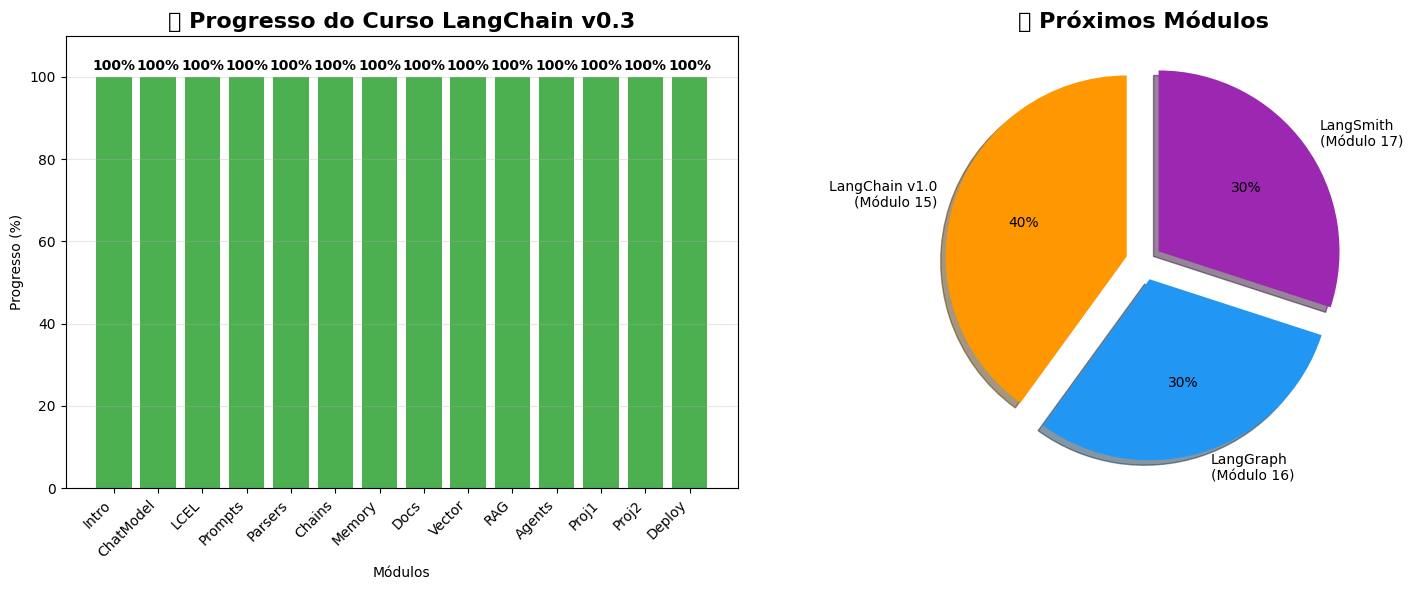

🎉 PARABÉNS! Você completou 14 de 17 módulos!
📊 Progresso total: 82.4%

🚀 Você já sabe:
✅ Criar sistemas de IA completos
✅ Fazer deploy em produção
✅ Otimizar performance
✅ Criar interfaces profissionais

🎯 Faltam apenas 3 módulos para dominar completamente o LangChain!


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico do progresso do curso
modules = ['Intro', 'ChatModel', 'LCEL', 'Prompts', 'Parsers', 'Chains',
          'Memory', 'Docs', 'Vector', 'RAG', 'Agents', 'Proj1', 'Proj2', 'Deploy']
progress = [100] * 14  # Todos os 14 módulos concluídos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras do progresso
colors = ['#4CAF50' if p == 100 else '#FFC107' for p in progress]
bars = ax1.bar(range(len(modules)), progress, color=colors)
ax1.set_title('🎯 Progresso do Curso LangChain v0.3', fontsize=16, fontweight='bold')
ax1.set_ylabel('Progresso (%)')
ax1.set_xlabel('Módulos')
ax1.set_xticks(range(len(modules)))
ax1.set_xticklabels(modules, rotation=45, ha='right')
ax1.set_ylim(0, 110)
ax1.grid(axis='y', alpha=0.3)

# Adicionar percentuais nas barras
for bar, pct in zip(bars, progress):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{pct}%', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza dos próximos módulos
remaining_modules = ['LangChain v1.0\n(Módulo 15)', 'LangGraph\n(Módulo 16)', 'LangSmith\n(Módulo 17)']
sizes = [40, 30, 30]
colors_pie = ['#FF9800', '#2196F3', '#9C27B0']
explode = (0.1, 0.1, 0.1)

ax2.pie(sizes, explode=explode, labels=remaining_modules, colors=colors_pie,
        autopct='%1.0f%%', shadow=True, startangle=90)
ax2.set_title('🔮 Próximos Módulos', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("🎉 PARABÉNS! Você completou 14 de 17 módulos!")
print(f"📊 Progresso total: {14/17*100:.1f}%")
print("\n🚀 Você já sabe:")
print("✅ Criar sistemas de IA completos")
print("✅ Fazer deploy em produção")
print("✅ Otimizar performance")
print("✅ Criar interfaces profissionais")
print("\n🎯 Faltam apenas 3 módulos para dominar completamente o LangChain!")